In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
from torchvision import datasets, transforms, utils
from torch.utils.data import DataLoader, Dataset
import numpy as np
import os



In [ ]:
path = './train_images/' # path to images folder

In [ ]:
imgs_transforms = transforms.Compose(
            [
                transforms.Resize((256,256),interpolation=transforms.InterpolationMode.BICUBIC),
                transforms.ToTensor(),
                transforms.Normalize(mean=[0.5], std=[0.5]),
             
            ]
        )

In [ ]:
train_dataset = datasets.ImageFolder(root = path, transform = imgs_transforms)

In [ ]:
loader = DataLoader(train_dataset, batch_size = 32, shuffle=True) # batch 32 -> incr

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([32, 3, 256, 256])
(32, 3, 256, 256)
(32, 256, 256, 3)


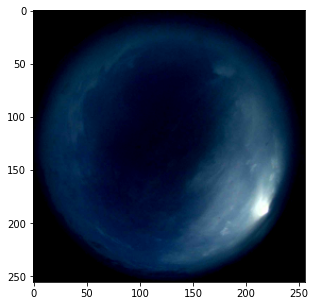

In [ ]:
images, labels = next(iter(loader))

def display_image(images):
    print(images.shape)
    images_np = images.numpy()
    plt.figure(figsize=(5,5))
    print(images_np.shape)
    
    img_plt = images_np.transpose(0,2,3,1)
    print(img_plt.shape)
    # display 5th image from dataset
    plt.imshow(img_plt[2])

display_image(images)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


labels:  tensor([197, 359, 149, 151,  93, 271])


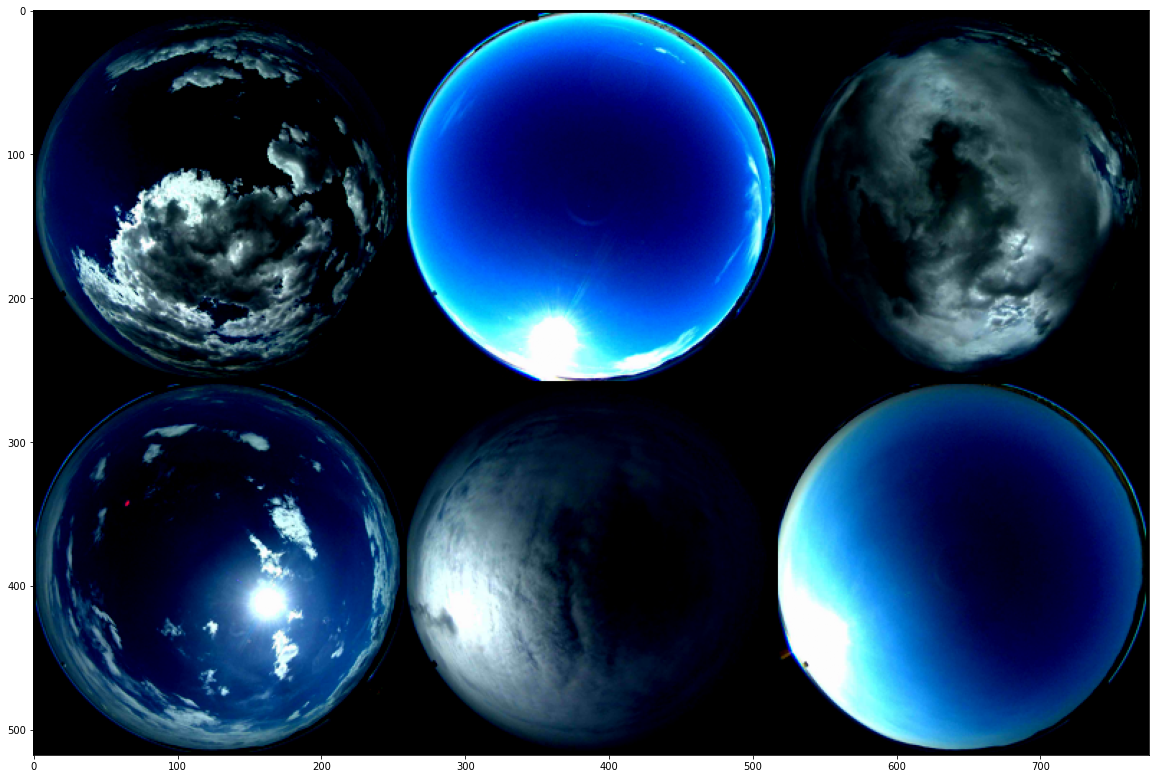

In [ ]:
def show_images(dataset):
    loader = DataLoader(dataset, batch_size = 6, shuffle=True) # batch 32 -> incr
    batch = next(iter(loader))
    images, labels = batch
    
    grid = utils.make_grid(images, nrow=3)
    plt.figure(figsize=(20,20))
    plt.imshow(np.transpose(grid, (1,2,0)))
    print('labels: ', labels)
  
show_images(train_dataset)

In [1]:
# s: stride
# p: padding
# k: kernel
# i: input
 # i=512 (s=3, p=1, k=7)
 # i=170 (s=3, p=1, k=7)
 # i=56 (s=3, p=1, k=7)
 # i=18 (s=1, p=1, k=7) *
 # output = 14 


In [ ]:
# [6, 3, 1536, 1536]

class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential( # like the Composition layer you built
            nn.Conv2d(3, 16, 7, stride=3, padding=1),
            nn.ReLU(),
            
            nn.Conv2d(16, 32, 7, stride=3, padding=1),
            nn.ReLU(),
            
            nn.Conv2d(32, 64, 7, stride=3, padding=1),
            nn.ReLU(),
            
            nn.Conv2d(64, 128, 7, stride=1, padding=1),
   
#             nn.ReLU(),
#             nn.Conv2d(512, 1024, 3, stride=2, padding=1),
#             nn.ReLU(),
#             nn.Conv2d(1024, 1024, 7)
            
        )
        self.decoder = nn.Sequential(

#             nn.ConvTranspose2d(1024, 1024, 7),
#             nn.ReLU(),
            
            nn.ConvTranspose2d(128, 64, 7, stride=1, padding=1),
            nn.ReLU(),
           
            nn.ConvTranspose2d(64, 32, 7, stride=3, padding=1,output_padding=1), 
            nn.ReLU(),
            
            nn.ConvTranspose2d(32, 16, 7, stride=3, padding=1,output_padding=1),
            nn.ReLU(),

            nn.ConvTranspose2d(16, 3, 7, stride=3, padding=1, output_padding=2), 
                
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [ ]:
def train(model, num_epochs=5, batch_size=8, learning_rate=1e-3):
    torch.manual_seed(42)
    criterion = nn.MSELoss() # mean square error loss
    optimizer = torch.optim.Adam(model.parameters(),
                                 lr=learning_rate, 
                                 weight_decay=1e-5) # <--
    train_loader = DataLoader(train_dataset, batch_size = batch_size, shuffle=True) # batch 32 -> incr
#     train_loader = torch.utils.data.DataLoader(mnist_data, 
#                                                batch_size=batch_size, 
#                                                shuffle=True)
    outputs = []
    for epoch in range(num_epochs):
        for data in train_loader:
            img, _ = data
            recon = model(img)
            # loss = criterion(outputs,target.view(1, -1))
            loss = criterion(recon, img)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()

        print('Epoch:{}, Loss:{:.4f}'.format(epoch+1, float(loss)))
        outputs.append((epoch, img, recon),)
    return outputs

In [ ]:
model = Autoencoder()
max_epochs = 10
outputs = train(model, num_epochs=max_epochs)

Epoch:1, Loss:0.2554
Epoch:2, Loss:0.2477


In [ ]:
import dill

model_copy=dill.dumps(model)
torch.save(model_copy,'model_ignite_original.pt')


In [ ]:
torch.save(model, './')